## Fuzzy Inference System

<img src="images/image-1.png"/>

<img src="images/image-2.png"/>

<img src="images/image-3.png"/>

<img src="images/image-4.png"/>

<img src="images/image-5.png"/>

In [1]:
class Fuzzy():

    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value *(self.max - self.min) + self.min

# down
# value = (max - x) / (max - min)
# value * (max - min) = max - x
# value * (max - min) - max = - x
# - x = value * (max - min) - max
# x = max - value * (max - min)

# up
# value = (x - min) / (max - min)
# value * (max - min) = x - min
# x = value *(max-min) + min

In [2]:
# Permintaan
# turun /naik
fis = Fuzzy()
fis.min = 1000
fis.max = 5000
turun = fis.down(4000)
print(f"turun: {turun}")
naik = fis.up(4000)
print(f"naik: {naik}")

turun: 0.25
naik: 0.75


In [3]:
# Persediaan
# sedikit/ banyak
fis = Fuzzy()
fis.min = 100
fis.max = 600

sedikit = fis.down(300)
banyak = fis.up(300)

print(f"sedikit: {sedikit}")
print(f"banyak: {banyak}")

sedikit: 0.6
banyak: 0.4


In [4]:
# Produksi
fis = Fuzzy()
fis.min = 2000
fis.max = 7000

berkurang = fis.rev_down(0.25)
bertambah = fis.rev_up(0.6)

print(f"berkurang: {berkurang}")
print(f"bertambah: {bertambah}")

berkurang: 5750.0
bertambah: 5000.0


In [5]:
class Demand(Fuzzy):
    
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1
        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0
        return self.up(x)

class Stock(Fuzzy):
    
    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1
        return self.down(x)

    def a_lot(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0
        return self.up(x)

class Production(Fuzzy):

    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)
        

In [6]:
# Permintaan = Demand
# turun = decrease
# naik = increase
# Persediaan = Stock
# sedikit = a_few
# banyak = a_lot
# Produksi = Production
# berkurang = reduce
# bertambah = add

In [7]:
pmt = Demand()
x = 4000
pmt.decrease(900)

0

In [8]:
prod = Production()
fuzzy_value = 0
prod.reduce(fuzzy_value)

7000

In [9]:
rule_map = {
    ("decrease", "a_lot"): "reduce",
    ("decrease", "a_few"): "reduce",
    ("increase", "a_lot"): "add",
    ("increase", "a_few"): "add",
}

In [10]:
fuzzy_real = 0
fuzzy = 0
for k, v in rule_map.items():
    # print(f"{k[0]=} {k[1]=}")
    # print(f"{v=}")
    demand = Demand()
    stock = Stock()
    prod = Production()
    
    x_demand = 4000
    x_stock = 300

    fuzzy_demand = demand.decrease(x_demand) if k[0] == "decrease" else demand.increase(x_demand)
    fuzzy_stock = stock.a_few(x_stock) if k[1] == "a_few" else stock.a_lot(x_stock)

    fuzzy_prod = min(fuzzy_demand, fuzzy_stock)
    x_prod = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)
    # print(f"{fuzzy_prod=} {x_prod=}")
    fuzzy_real += fuzzy_prod * x_prod
    fuzzy += fuzzy_prod

result = int(fuzzy_real / fuzzy)
print(f"Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {result} kemasan.")

Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


## Tugas Latihan
- Buat gambar grafik di bawah dengan menggunakan hasil perhitungan dari code yang sudah dibuat sebelumnya

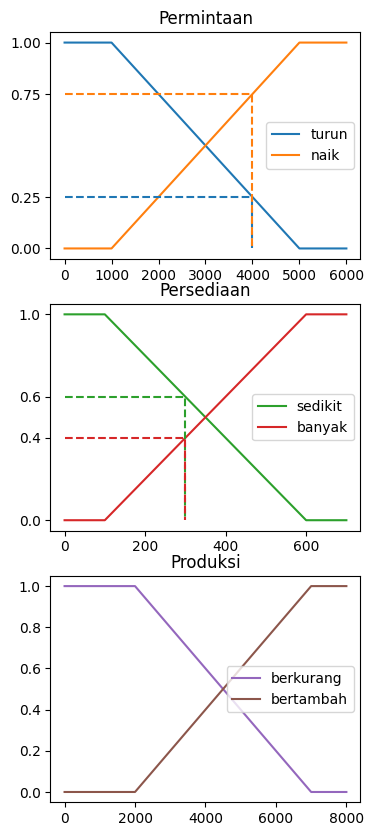